In [454]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import img_scale

file1 = fits.open("./hst1.fits")
file2 = fits.open("./hst2.fits")
file3 = fits.open("./hst3.fits")

# Check All Header Indexes
# for key, value in file1[0].header.items():
#     print(f'{key} = {value}')

# Problem 6: RA, Dec, and Exp Time
print(file1[0].header['RA_TARG'], "deg")
print(file1[0].header['DEC_TARG'], "deg")
print(file1[0].header['EXPTIME'], "s")
print("\n")

for hdu in file1:
    if 'SCI' in hdu.header.get('EXTNAME', ''):
        data = hdu.data

        mean_value = np.mean(data)
        min_value = np.min(data)
        max_value = np.max(data)

        # Problem 7: Mean, Min, Max
        print(f"Mean Value: {mean_value}")
        print(f"Minimum Value: {min_value}")
        print(f"Maximum Value: {max_value}")
        print("\n")

        # Problem 8: Scale and Plot
        scaled_data1 = img_scale.log(data)


178.4245416667 deg
47.858 deg
320.0 s


Mean Value: 0.0873652771115303
Minimum Value: -138.06459045410156
Maximum Value: 3073.268798828125


img_scale : log


In [455]:
for hdu in file2:
    if 'SCI' in hdu.header.get('EXTNAME', ''):
        data = hdu.data

        mean_value = np.mean(data)
        min_value = np.min(data)
        max_value = np.max(data)

        # Problem 8: Scale and Plot
        scaled_data2 = img_scale.log(data)

img_scale : log


In [456]:
for hdu in file3:
    if 'SCI' in hdu.header.get('EXTNAME', ''):
        data = hdu.data

        mean_value = np.mean(data)
        min_value = np.min(data)
        max_value = np.max(data)

        # Problem 8: Scale and Plot
        scaled_data3 = img_scale.log(data)

img_scale : log


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


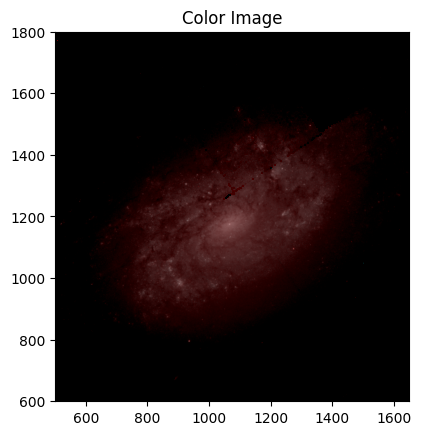

In [457]:
# Problem 9: Combine the Color Image
color_image = np.zeros((scaled_data1.shape[0], scaled_data1.shape[1], 3), dtype=float)
color_image[:, :, 0] = scaled_data1 + 0.25
color_image[:, :, 1] = scaled_data2 + 0.25
color_image[:, :, 2] = scaled_data3 + 0.25

# Problem 10: Algo Adaption
maxRGB = np.max(color_image)
if maxRGB > 1:
    color_image /= maxRGB

# Display the Color Image
plt.imshow(color_image)
plt.title('Color Image')

plt.xlim(500, 1650)
plt.ylim(600, 1800)
plt.show()


file1.close()
file2.close()
file3.close()